In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')
plt.xkcd();

In [3]:
ls

Untitled.ipynb                   dsc-monte-carlo-simulations-lab/
dataset_Facebook-Copy1.csv


In [3]:
df = pd.read_csv('dataset_Facebook-Copy1.csv')

In [4]:
df.head()

,Page total likes;Type;Category;Post Month;Post Weekday;Post Hour;Paid;Lifetime Post Total Reach;Lifetime Post Total Impressions;Lifetime Engaged Users;Lifetime Post Consumers;Lifetime Post Consumptions;Lifetime Post Impressions by people who have liked your Page;Lifetime Post reach by people who like your Page;Lifetime People who have liked your Page and engaged with your post;comment;like;share;Total Interactions
0,139441;Photo;2;12;4;3;0;2752;5091;178;109;159;...
1,139441;Status;2;12;3;10;0;10460;19057;1457;136...
2,139441;Photo;3;12;3;3;0;2413;4373;177;113;154;...
3,139441;Photo;2;12;2;10;1;50128;87991;2211;790;...
4,139441;Photo;2;12;2;3;0;7244;13594;671;410;580...


In [5]:
df = pd.read_csv('dataset_Facebook-Copy1.csv', delimiter = ';')

In [6]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


## Do people that get paid have more likes?

In [9]:
df[df['Paid'] == 0]['like'].mean()

155.84679665738162

In [8]:
df[df['Paid'] == 1]['like'].mean()

235.6474820143885

- Null Hypothesis: Number of likes for paid posts <= number of likes for unpaid posts
- Alternative Hypothesis: Number of likes for paid posts > number of likes for unpaid posts

In [12]:
import seaborn as sns

In [14]:
df.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [15]:
df.dropna(subset = ['like', 'Paid'], inplace = True)

In [17]:
df.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


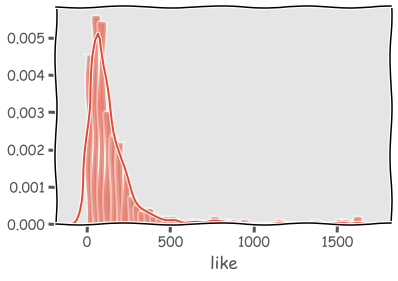

In [18]:
sns.distplot(df[df['Paid'] == 0]['like'])

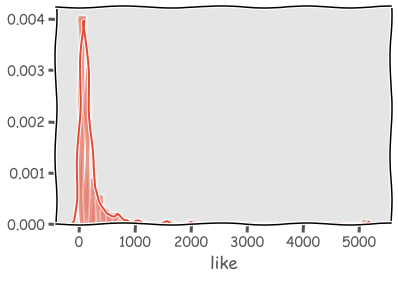

In [19]:
sns.distplot(df[df['Paid'] == 1]['like'])

In [20]:
df_subset = df[df['like'] < 500]

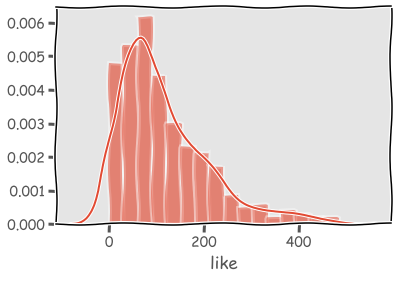

In [21]:
sns.distplot(df_subset[df_subset['Paid'] == 0]['like'])

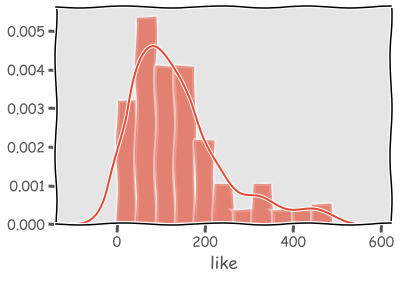

In [22]:
sns.distplot(df_subset[df_subset['Paid'] == 1]['like'])

In [24]:
df_subset[df_subset['Paid'] == 0]['like'].std()

94.16243735588473

In [25]:
df_subset[df_subset['Paid'] == 1]['like'].std()

104.59388732063597

In [26]:
from scipy.stats import ttest_ind

In [28]:
ttest_ind(df_subset[df_subset['Paid'] == 0]['like'], df_subset[df_subset['Paid'] == 1]['like'], equal_var=False)

Ttest_indResult(statistic=-2.0369709028071945, pvalue=0.042931282022915)

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([260.,  68.,  15.,   4.,   3.,   3.,   0.,   1.,   1.,   4.]),
 array([   0. ,  163.9,  327.8,  491.7,  655.6,  819.5,  983.4, 1147.3,
        1311.2, 1475.1, 1639. ]),
 <a list of 10 Patch objects>)

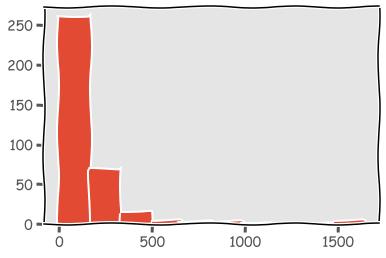

In [11]:
plt.hist(df[df['Paid'] == 0]['like'])

In [10]:
df[df['Paid'] == 0]['like'].values

array([7.900e+01, 1.300e+02, 6.600e+01, 3.250e+02, 1.520e+02, 1.610e+02,
       1.130e+02, 2.330e+02, 8.800e+01, 9.000e+01, 1.370e+02, 8.600e+01,
       4.000e+01, 5.400e+01, 3.400e+01, 6.600e+01, 0.000e+00, 1.600e+01,
       7.200e+01, 9.900e+01, 8.800e+01, 4.120e+02, 1.000e+02, 5.230e+02,
       1.070e+02, 2.700e+01, 1.550e+02, 9.800e+01, 5.600e+01, 1.720e+02,
       9.600e+01, 2.270e+02, 4.400e+01, 2.160e+02, 2.600e+01, 4.700e+01,
       1.740e+02, 1.800e+01, 7.700e+01, 1.200e+01, 4.800e+01, 2.020e+02,
       6.400e+01, 6.600e+01, 1.640e+02, 4.000e+01, 7.600e+01, 6.000e+01,
       7.700e+01, 4.800e+01, 5.300e+01, 8.400e+01, 2.260e+02, 9.900e+01,
       0.000e+00, 8.500e+01, 5.600e+01, 2.900e+01, 8.600e+01, 3.700e+02,
       1.900e+02, 9.900e+01, 1.300e+02, 2.700e+02, 3.000e+01, 3.310e+02,
       7.800e+01, 3.010e+02, 1.110e+02, 1.240e+02, 1.530e+02, 5.100e+01,
       1.150e+02, 3.280e+02, 1.505e+03, 6.300e+01, 1.300e+01, 9.550e+02,
       1.810e+02, 1.930e+02, 1.250e+02, 2.170e+02, 

In [16]:
df.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [17]:
df.dropna(subset = ['Paid', 'like'], inplace = True)

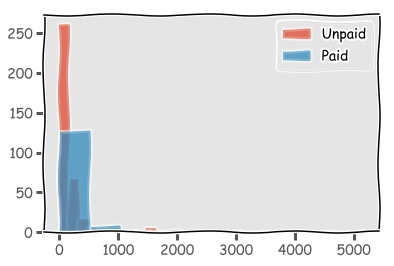

In [22]:
plt.hist(df[df['Paid'] == 0]['like'], label = 'Unpaid', alpha = 0.5)
plt.hist(df[df['Paid'] == 1]['like'], label = 'Paid', alpha = 0.5)
plt.legend();

In [29]:
paid = df[df['Paid'] == 1]['like']
unpaid = df[df['Paid'] == 0]['like']

In [30]:
paid_samp = df.sample(replace = False, n = len(paid))
unpaid_samp = df.drop(paid_samp.index, axis = 0)

In [32]:
paid.shape

(139,)

In [33]:
df.shape, paid_samp.shape, unpaid_samp.shape

((498, 19), (139, 19), (359, 19))

In [34]:
mean_diff = paid.mean() - unpaid.mean()
count = 0
sample_diffs = []
for i in range(10000):
    paid_samp = df.sample(replace = False, n = len(paid))
    unpaid_samp = df.drop(paid_samp.index, axis = 0)
    sample_diff = paid_samp['like'].mean() - unpaid_samp['like'].mean()
    sample_diffs.append(sample_diff)
    if sample_diff >= mean_diff:
        count += 1

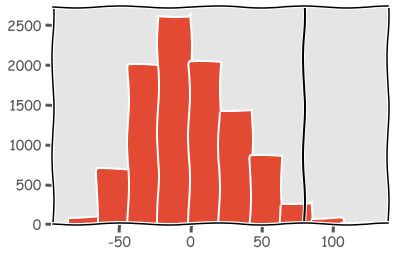

In [35]:
plt.hist(sample_diffs)
plt.axvline(mean_diff, color = 'k')

In [36]:
count / 10000

0.0103

In [37]:
ttest_ind(paid, unpaid)

Ttest_indResult(statistic=2.480522595537424, pvalue=0.013449631384145896)